In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files    
import glob
import cv2
import PIL
import glob
import keras
import os
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
def load_dataset(path):
    data = load_files(path)
    sign_files = np.array(data['filenames'])
    sign_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return sign_files, sign_targets

train_files, train_targets = load_dataset('train')

In [3]:
train_dir = "C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train"

def load_dir(path):
    data = load_files(path)
    plant_files = np.array(data['filenames'])
    return plant_files

dir_list = load_dir(train_dir)

print(dir_list)

[ 'C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train\\M\\M2059.jpg'
 'C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train\\Z\\Z1352.jpg'
 'C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train\\M\\M2567.jpg'
 ...,
 'C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train\\O\\O1550.jpg'
 'C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train\\O\\O2409.jpg'
 'C:\\Users\\Aditya Pratap\\MY MACHINE LEARNING\\ASL Recognition\\train\\W\\W340.jpg']


In [4]:
train_files.sort()
train_targets.sort()

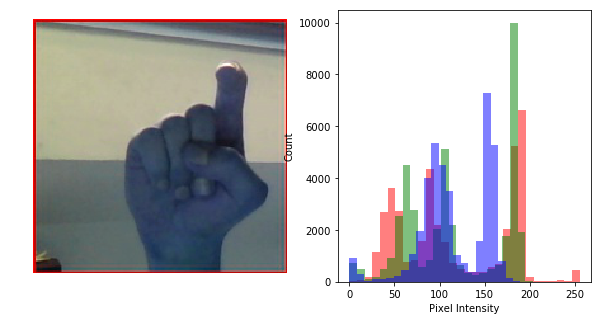

train\X\X190.jpg


In [5]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)
plotHistogram(cv2.imread(train_files[70000]))
plt.show()
print(train_files[70000])

In [6]:
def hand_mask(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    sensitivity = 35
    lower_hsv = np.array([0, 60, 50])
    upper_hsv = np.array([20, 255, 255])
    
    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)    
    return mask

def hand_seg(image):
    mask = hand_mask(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def increase_brightness_contrast(img):
    alpha = 1.5
    beta = 30
    result = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
    return result

def gray_scale(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_image

def canny_edge(img):
    edges = cv2.Canny(img,100,200)
    return edges

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

def hist_eq(img):
    output1 = cv2.equalizeHist(img)    
    clahe = cv2.createCLAHE()
    output2 = clahe.apply(img)
    
    return output2

In [7]:
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator


mask_images = [] #Store all masked images
segmented_images = [] #Store all segmented images
original_images = [] # Store all original resized images
cannies = []
labels = [] # Store all labels
blurs = []
grays = []
hists = []
sharpen1 = []
sharpen2 =[]
img_size = 100

def blur_image(img):
    blur = cv2.bilateralFilter(img,9,75,50)
    return blur

for i in dir_list:    
    image = cv2.imread(i) #Read every image using cv2.imread()
    head, tail = os.path.split(os.path.split(i)[0])#Take the path of the image, split it and the name of the class is tail
    labels.append(tail) #append the name of the class to labels    
    resized = cv2.resize(image, (img_size, img_size)) #Resize every image to 50 by 50  
    blur = blur_image(resized)
    gray = gray_scale(blur)
    hist = hist_eq(gray)
    sharp1 = sharpen_image(gray)
    #sharp2 = sharpen_image(hist)
    hists.append(hist)
    original_images.append(resized)
    grays.append(gray)
    sharpen1.append(sharp1)
    #sharpen2.append(sharp2)


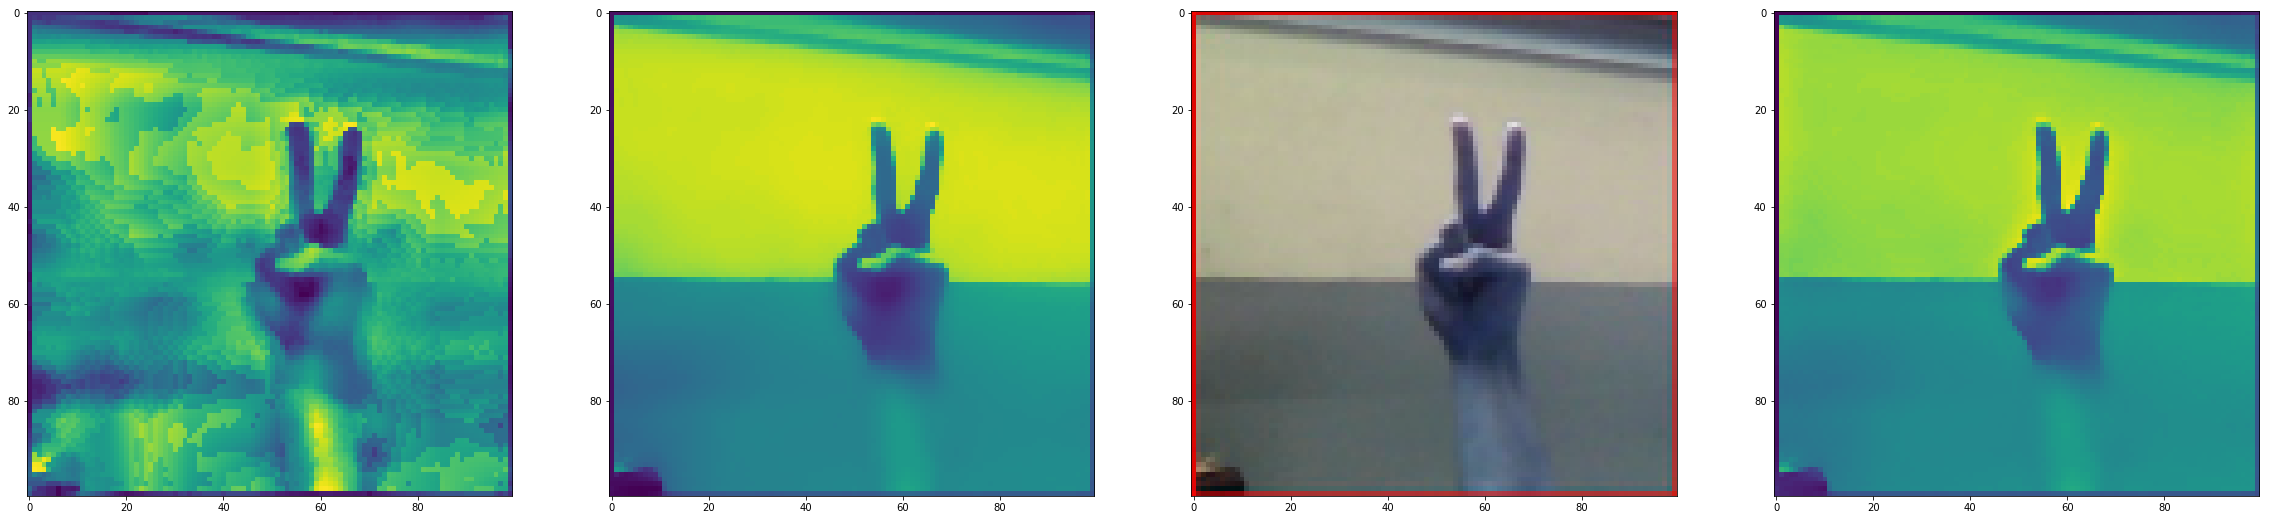

V


In [14]:
i = 97

fig, axs = plt.subplots(1,4, figsize=(40, 40))
axs[0].imshow(hists[i])
axs[1].imshow(grays[i])
axs[2].imshow(original_images[i])
axs[3].imshow(sharpen1[i])

plt.show()
print(labels[i])

In [57]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer().fit(labels)
label = lb.transform(labels)
print(label)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [70]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sharpen1, label, test_size = 0.20, random_state = 42)

In [89]:
Xtrain= []
Xtest = []
arraylist1 = np.array(x_train)
arraylist2 = np.array(x_test)
for i in arraylist1:
    k = i.reshape(100, 100, 1)
    Xtrain.append(k)
    
for j in arraylist2:
    l = i.reshape(100, 100, 1)
    Xtest.append(k)
   

In [90]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(Xtrain)

In [100]:
import numpy
import time
from  keras.models  import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

seed = 7

numpy.random.seed(seed)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(img_size, img_size, 1), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(28, activation='softmax'))

model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 96, 96, 32)        832       
_________________________________________________________________
batch_normalization_73 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 92, 92, 32)        25632     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
batch_normalization_74 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
dropout_46 (Dropout)         (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 42, 42, 64)        51264     
__________

In [101]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

callbacks_list = [learning_rate_reduction]

Xtrain_data = np.array(Xtrain)
Ytrain_data = np.array(y_train)

Xvalid_data = np.array(Xtest)
Yvalid_data = np.array(y_test)



In [ ]:
Xvalid_data.shape

(16800, 100, 100, 1)

In [ ]:
# fit model
hist = model.fit_generator(datagen.flow(Xtrain_data, Ytrain_data, batch_size=75), 
                           epochs=35, validation_data=(Xvalid_data, Yvalid_data), 
                           steps_per_epoch=Xtrain_data.shape[0], callbacks=callbacks_list)

Epoch 1/35
  437/67199 [..............................] - ETA: 1109911s - loss: 3.5723 - acc: 0.0772